# [LAB 10] 6. 독립표본 T 검정 연습문제

어떤 화학약품의 제조에 상표가 다른 두 종류의 원료가 사용되고 있다.각 원료에서 주성분 A의 함량은 material 데이터셋에 정리되어 있다.이 두 원료의 주성분 A의 함량이 다른지를 분석하라.

### #01.준비작업
#### [1] 패키지 참조

In [10]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt
from scipy.stats import t, normaltest, bartlett, levene, ttest_ind
from statannotations.Annotator import Annotator

#### [2] 그래프 초기화

In [11]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### [3] 데이터 불러오기
어떤 화학약품의 제조에 상표가 다른 두 종류의 원료가 사용되고 있다.각 원료에서 주성분 A의 함량은 material 데이터셋에 정리되어 있다.이 두 원료의 주성분 A의 함량이 다른지를 분석하라.

In [12]:
origin = load_data ('material')
origin

[data] https://data.hossam.kr/data/lab10_/material.xlsx
[desc] 어떤 화학 약품에 사용되는 서로 다른 상표의 주성분 A 함량표 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,상표1,상표2
0,80.4,81.8
1,78.2,82.7
2,80.1,80.7
3,77.1,84.0
4,79.6,79.0
5,80.4,82.3
6,81.6,81.0
7,79.9,80.2
8,84.4,82.2
9,80.9,82.3


#### [4] 신뢰구간 확인하기

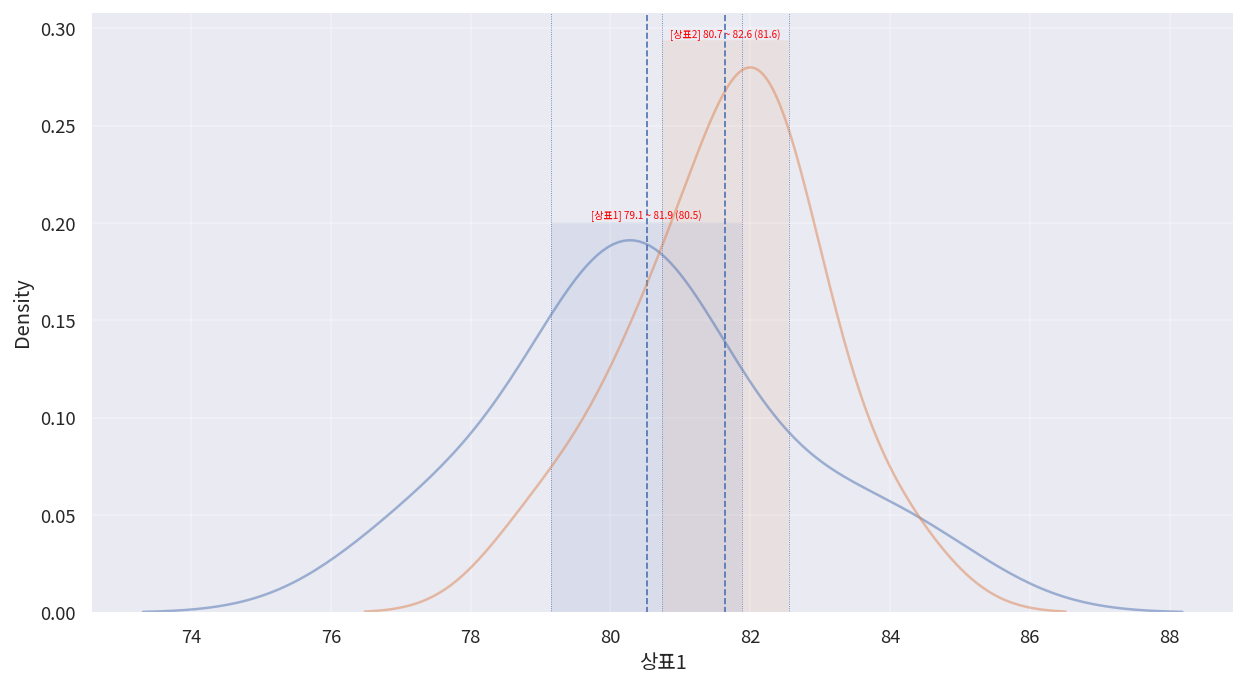

In [13]:
data = origin[['상표1','상표2']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


> 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있따. 
> 또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다

#### [5] 가설검정의 가정 확인

In [14]:
data = origin[['상표1','상표2']]                      # 검사하려는 데이터 추출

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:

    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"                      # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)     # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                        # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center='median')   # 모든 컬럼 데이터 전달

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df



,statistic,p-value,result
field,,,
상표1,0.638272,0.726777,True
상표2,0.774961,0.678765,True
Bartlett,1.555316,0.212352,True


> 정규성과 등분산성을 모두 충족한다, 이표본 검정 t test 진행해도 무방하다

#### [6] 두 그룹간 성분 함유량에 차이가 있는지 검정


 | 구분           | 수식          | 내용                         |
|----------------|---------------|------------------------------|
| B 그룹의 평균  | μ(B)          |                              |
| G 그룹의 평균  | μ(G)          |                              |
| 귀무가설(H₀)   | μ(B) = μ(G)   | 두 그룹의 함유량 평균은 차이가 없다. |

| 구분           | 수식          | 내용                         |
|----------------|---------------|------------------------------|
| 대립가설(H₁)   | μ(B) ≠ μ(G)   | 두 그룹의 함유량 평균에는 차이가 있다. |

In [15]:
s, p = ttest_ind(origin['상표1'], origin['상표2'],alternative ='two-sided' ) #alternative = 'less' / 'greater' 
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -1.528, p-value: 0.142, 귀무가설 채택'

In [ ]:
# 검정할 데이터 필드명
fields = ['상표1', '상표2']

# 로그 적용 여부
use_log = False   #False / True

# 검정할 데이터
df = origin[fields]

# 검사항 알고리즘
alternative = ["two-sided", "less", "greater"]

# 결과를 저장할 빈 리스트
result = []

# 가설식 템플릿
fmt = "μ({f0}) {0} μ({f1})"

# 등분산성 충족 여부
equal_var = True

for a in alternative:
    if use_log:
        input1 = np.log(df[fields[0]])
        input2 = np.log(df[fields[1]])
    else:
        input1 = df[fields[0]]
        input2 = df[fields[1]]

    s, p = ttest_ind(input1, input2, alternative=a,
                     equal_var=equal_var)

    itp = None

    if a == "two-sided":
        itp = fmt.format("==" if p > 0.05 else "≠", f0=fields[0], f1=fields[1])
    elif a == "less":
        itp = fmt.format("> " if p > 0.05 else "<", f0=fields[0], f1=fields[1])
    else:
        itp = fmt.format("< " if p > 0.05 else ">", f0=fields[0], f1=fields[1])

    result.append({
        "alternative": a,       # 검정의 의미
        "statistic": s,         # 통계량
        "p-value": p,           # 유의수준
        "H0": p > 0.05,         # 귀무가설 채택 여부
        "H1": p <= 0.05,        # 대립가설 채택 여부
        "interpretation": itp   # 해석 결과
    })

    # 두 집단의 평균이 같다고 판정되면 이후 less, greater는 무의미하므로 중단
    if a == "two-sided" and p > 0.05:
        break

rdf = DataFrame(result)
rdf.set_index("alternative", inplace=True)
rdf


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-1.528327,0.142093,True,False,μ(상표1) == μ(상표2)


> 두 상표의 화학약품에 대한 주성분 A 함량을 비교하기 위해 독립표본 T 검정을 수행한 결과 두 상품의 주성분함량은 통계적으로 유의한 차이를 보이지 않는 것으로 확인되었따 (P>0.05)

> p value 가 0.05 보다 크므로 귀무가설이 채택되어 상표 1, 상표 2 간의 평균 함유량에는 차이가 없다

#### [7] 가설 검정 결과 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:1.421e-01 t=-1.528e+00


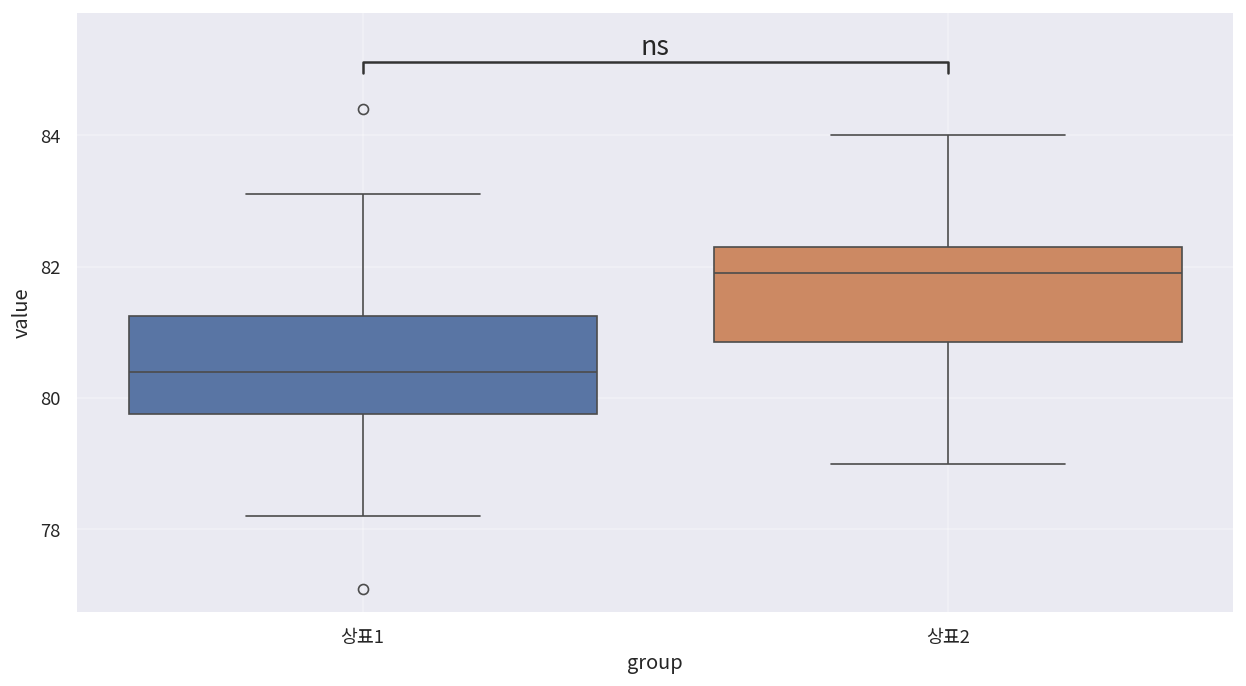

In [18]:
# 검정할 데이터 필드명
fields = ['상표1', '상표2']

# 검정 방법
#  `t-test_ind`, `t-test_paired`, `t-test_welch`, `Mann-Whitney`,
#  `Mann-Whitney-gt`, `Mann-Whitney-ls`, `Levene`, `Wilcoxon`, `Kruskal`
test_method = 't-test_ind'

# 데이터 재배치
df = melt(origin[fields], value_vars=fields, var_name='group', value_name='value')

# 1) 그래프 초기화
width_px = 1280                      # 그래프 가로 크기
height_px = 720                      # 그래프 세로 크기
rows = 1                             # 그래프 행 수
cols = 1                             # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')

annotator = Annotator(ax, data=df, x='group', y='value',
                      pairs=[fields])
annotator.configure(test=test_method)
annotator.apply_and_annotate()

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)             # 배경 격자 표시

# 4) 출력
plt.tight_layout()                   # 여백 제거
plt.show()                           # 그래프 화면 출력
plt.close()                          # 그래프 작업 종료
